<a href="https://colab.research.google.com/github/nisanitachi/myml/blob/main/knn%26svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
df['target_code']=iris.target

In [ ]:
df.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_code
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
df['flower_name']=df.target_code.apply(lambda x:iris.target_names[x])

In [ ]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_code,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df0=df[df.target_code==0]
df1=df[df.target_code==1]
df2=df[df.target_code==2]

In [ ]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_code,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df0.shape

(50, 6)

In [ ]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_code,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [ ]:
df1.shape

(50, 6)

In [ ]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_code,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

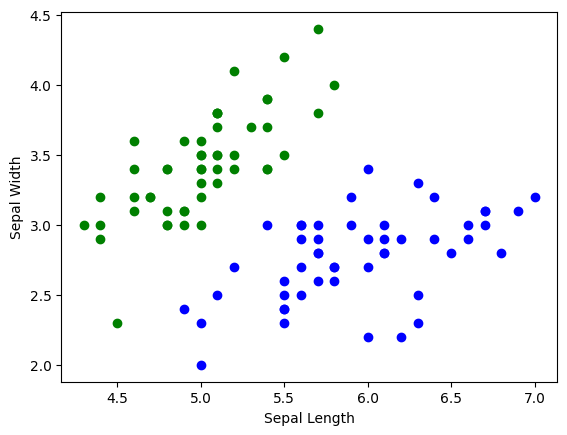

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue")

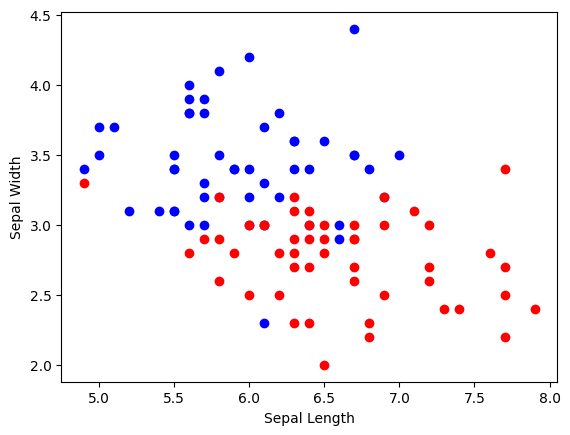

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df1['sepal length (cm)'], df0['sepal width (cm)'],color="blue")
plt.scatter(df2['sepal length (cm)'], df1['sepal width (cm)'],color="red")

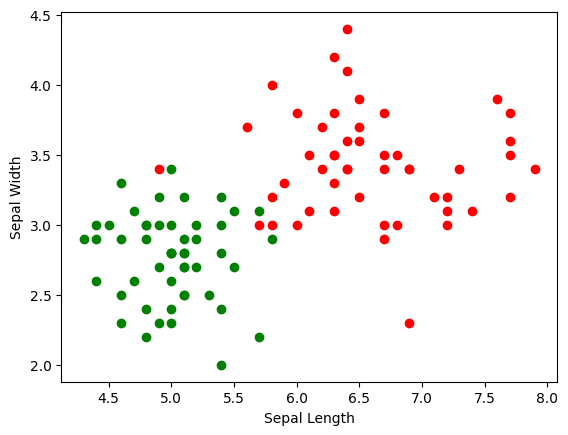

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df2['sepal length (cm)'], df0['sepal width (cm)'],color="red")
plt.scatter(df0['sepal length (cm)'], df1['sepal width (cm)'],color="green")

# ***TRAINING THE DATASET***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['target_code','flower_name'], axis='columns') #features
y = df.target_code #result

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_test.shape

(30, 4)

In [ ]:
len(X)

150

In [ ]:
len(y)


150

In [ ]:
len(y_train)

120

# ***KNN MODEL***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.score(X_test, y_test)

0.9666666666666667

In [ ]:
 y_pred=knn.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [ ]:
df_pred=pd.DataFrame(X_test)

df_pred.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [ ]:
df_pred['flower_code']=y_pred
df_pred['flower_name']=df_pred.flower_code.apply(lambda x:iris.target_names[x])

In [ ]:
df_pred.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_code,flower_name
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


# ***SVM MODEL***

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train, y_train)

SVC()

In [ ]:
model.score(X_test, y_test)

0.9666666666666667

In [ ]:
y_pred_svm=model.predict(X_test)


In [ ]:
y_pred_svm

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [ ]:
df_pred_svm=pd.DataFrame(X_test)
df_pred_svm['flower_code']=y_pred_svm
df_pred_svm['flower_name']=df_pred_svm.flower_code.apply(lambda x:iris.target_names[x])

In [ ]:
df_pred_svm.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_code,flower_name
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica
